# Explore here

We are going to focus on Lake_Bilancino for this exercise. Do and EDA and Build a Model.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Lake Bilancino dataset
df = pd.read_csv('/workspaces/Time-Series-Marcel/data/acea-water-prediction/Lake_Bilancino.csv')

# Display the first few rows of the dataset
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [3]:
# Drop not useful columns
df_Bilancino = df.drop(['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata', 'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci'], axis=1)

df_Bilancino.head()

,Date,Lake_Level,Flow_Rate
0,03/06/2002,249.43,0.31
1,04/06/2002,249.43,0.31
2,05/06/2002,249.43,0.31
3,06/06/2002,249.43,0.31
4,07/06/2002,249.44,0.31


In [4]:
# Check for missing values
print(df_Bilancino.isnull().sum())

Date           0
Lake_Level     0
Flow_Rate     21
dtype: int64


In [5]:
# Convert the 'date' column to datetime format
df_Bilancino['Date'] = pd.to_datetime(df_Bilancino['Date'], format='%d/%m/%Y')

In [6]:
# Extract the year and create a new 'year' column
df_Bilancino['Year'] = df_Bilancino['Date'].dt.year

In [7]:
# Group by the 'Year' column and count null values for each column
null_counts_per_year = df_Bilancino.groupby('Year').apply(lambda x: x.isnull().sum())

# Display the result
print(null_counts_per_year)

      Date  Lake_Level  Flow_Rate  Year
Year                                   
2002     0           0         16     0
2003     0           0          5     0
2004     0           0          0     0
2005     0           0          0     0
2006     0           0          0     0
2007     0           0          0     0
2008     0           0          0     0
2009     0           0          0     0
2010     0           0          0     0
2011     0           0          0     0
2012     0           0          0     0
2013     0           0          0     0
2014     0           0          0     0
2015     0           0          0     0
2016     0           0          0     0
2017     0           0          0     0
2018     0           0          0     0
2019     0           0          0     0
2020     0           0          0     0


/tmp/ipykernel_580/616062419.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_counts_per_year = df_Bilancino.groupby('Year').apply(lambda x: x.isnull().sum())


All Null values are found from the years 2002 & 2003. Therefore we will drop those rows and focus on the more accurate data from 2004 onwards.

In [8]:
# Filter the DataFrame to keep only years >= 2004
df_Bilancino = df_Bilancino[df_Bilancino['Year'] > 2003]
# Drop the 'Year' column as it is no longer needed
df_Bilancino = df_Bilancino.drop('Year', axis=1)

df_Bilancino.head()

,Date,Lake_Level,Flow_Rate
577,2004-01-01,251.14,0.5
578,2004-01-02,251.21,0.5
579,2004-01-03,251.28,0.5
580,2004-01-04,251.35,0.5
581,2004-01-05,251.37,0.5


Visualitzation of Lake Data

/tmp/ipykernel_580/3886927952.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=df_Bilancino['Date'], y=df_Bilancino['Lake_Level'].fillna(method='ffill'), ax=ax, color='dodgerblue')


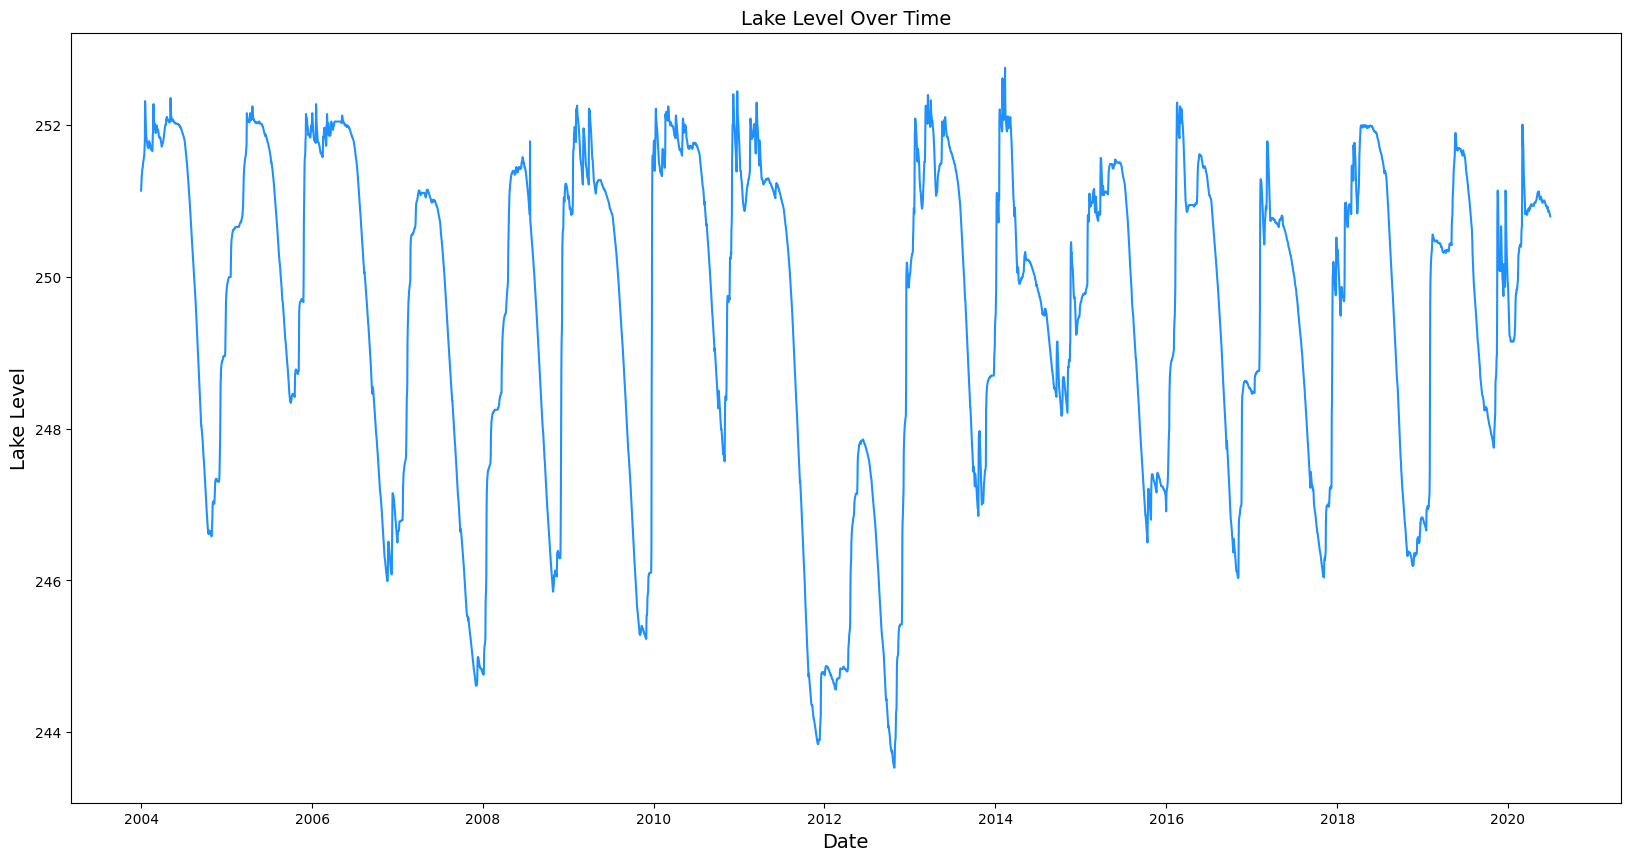

/tmp/ipykernel_580/3886927952.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sns.lineplot(x=df_Bilancino['Date'], y=df_Bilancino['Flow_Rate'].fillna(method='ffill'), ax=ax, color='dodgerblue')


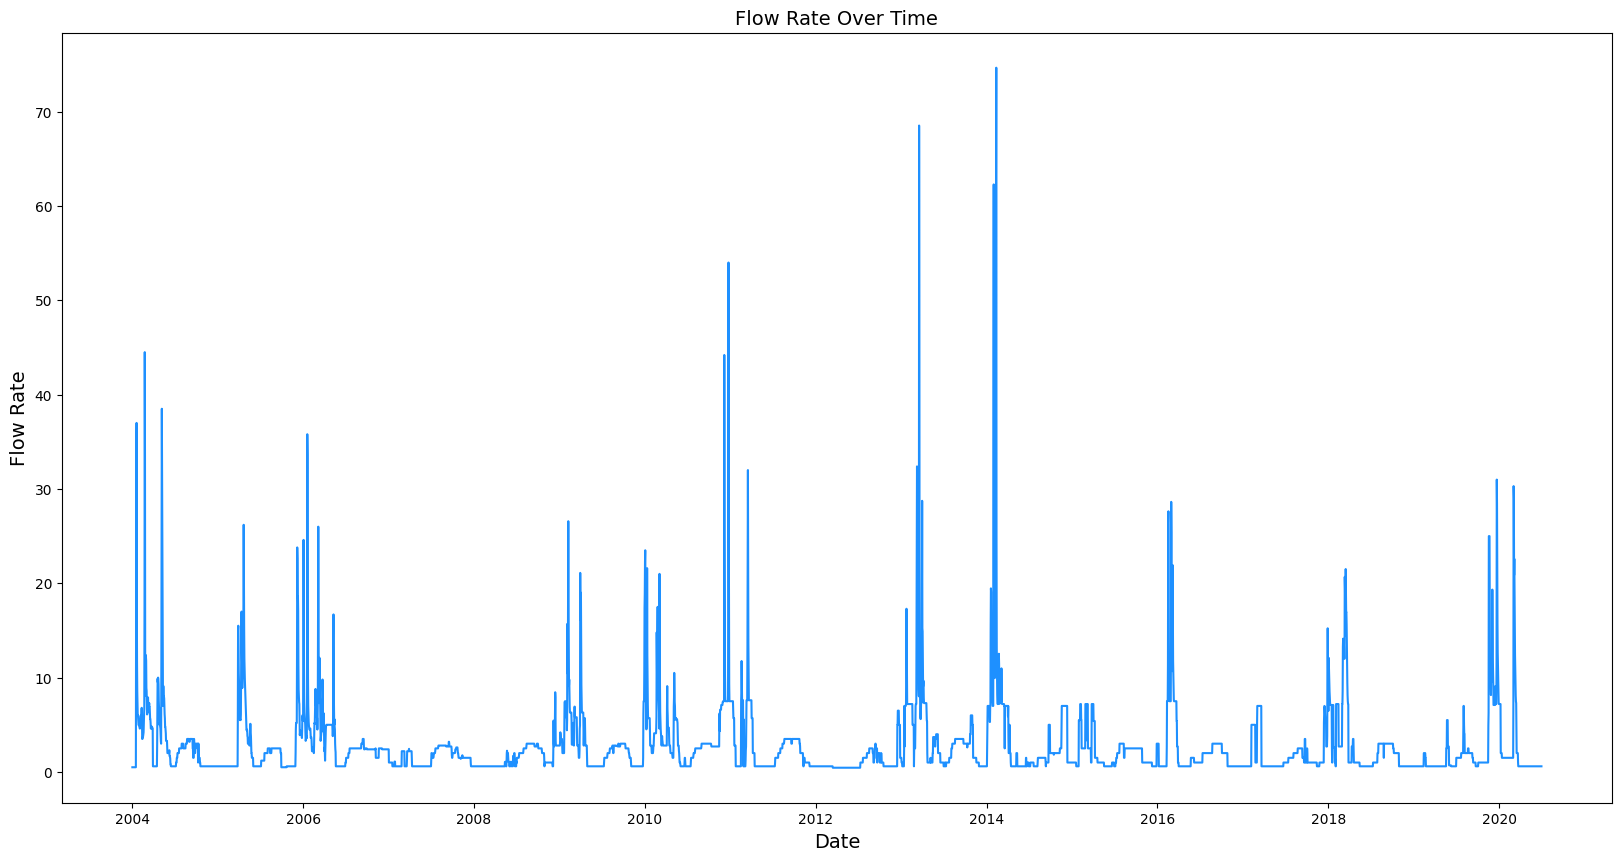

In [9]:
# Plotting Lake Level
f, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x=df_Bilancino['Date'], y=df_Bilancino['Lake_Level'].fillna(method='ffill'), ax=ax, color='dodgerblue')
ax.set_title('Lake Level Over Time', fontsize=14)
ax.set_ylabel('Lake Level', fontsize=14)
ax.set_xlabel('Date', fontsize=14)

plt.show()

# Plotting Flow Rate
f, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x=df_Bilancino['Date'], y=df_Bilancino['Flow_Rate'].fillna(method='ffill'), ax=ax, color='dodgerblue')
ax.set_title('Flow Rate Over Time', fontsize=14)
ax.set_ylabel('Flow Rate', fontsize=14)
ax.set_xlabel('Date', fontsize=14)

plt.show()

Overall statitical features of Lake level and Flow rate

In [10]:
# Calculate statistical features for Lake Level and Flow Rate
stat_features = df_Bilancino[['Lake_Level', 'Flow_Rate']].describe().T

# Calculate Interquartile Range (IQR)
stat_features['IQR'] = stat_features['75%'] - stat_features['25%']

# Add the range
stat_features['range'] = stat_features['max'] - stat_features['min']

# Calculate variance separately and add it to the DataFrame
variance = df_Bilancino[['Lake_Level', 'Flow_Rate']].var()
stat_features['variance'] = variance

# Reorder the columns
stat_features = stat_features[['mean', '50%', 'variance', 'std', '25%', '50%', '75%', 'IQR', 'min', 'max', 'range']]
stat_features.columns = ['mean', 'median', 'variance', 'standard deviation', 'q1', 'q2', 'q3', 'IQR', 'minimum', 'maximum', 'range']

# Display the relevant statistical features
print(stat_features)

                  mean  median   variance  standard deviation      q1      q2  \
Lake_Level  249.553735  250.24   4.766574            2.183248  247.93  250.24   
Flow_Rate     2.777826    1.50  17.064648            4.130938    0.60    1.50   

                q3   IQR  minimum  maximum  range  
Lake_Level  251.37  3.44   243.53   252.76   9.23  
Flow_Rate     3.00  2.40     0.45    74.65  74.20  


Explicar conclusiones:
Lake Level: La proximidad entre la media y mediana así como el estrecho rango interquartil muestra la estabilidad del "lake level" donde la mayoria de los valores se agrupan cerca de la media. Hay muy poca varianza entre los valores del "lake level". Se observa que el nivel del agua se mantiene casi siempre en un rango similar sin observarse grandes variaciones en el mismo.



Observamos un nivel de varianza muy grande en el flow rate. Hay momentos en los que el 

Falta de datos exogenos.
Un problema del dataset escodigo es que no tenemos datos exógenos del lago como por ejemplo la temperatura y o la lluvía durante este periodo de tiempo. Ello hace que no podamos analizar el impacto de dichas variables exógenas en el nivel del agua y en su velocidad de movimiento.

Exploring Trend, Stationality, Variability and Autocorrelation

/tmp/ipykernel_580/716599735.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  decomp_lake_level = seasonal_decompose(df_Bilancino['Lake_Level'].fillna(method='ffill'), model='additive', period=365)
/tmp/ipykernel_580/716599735.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  decomp_flow_rate = seasonal_decompose(df_Bilancino['Flow_Rate'].fillna(method='ffill'), model='additive', period=365)


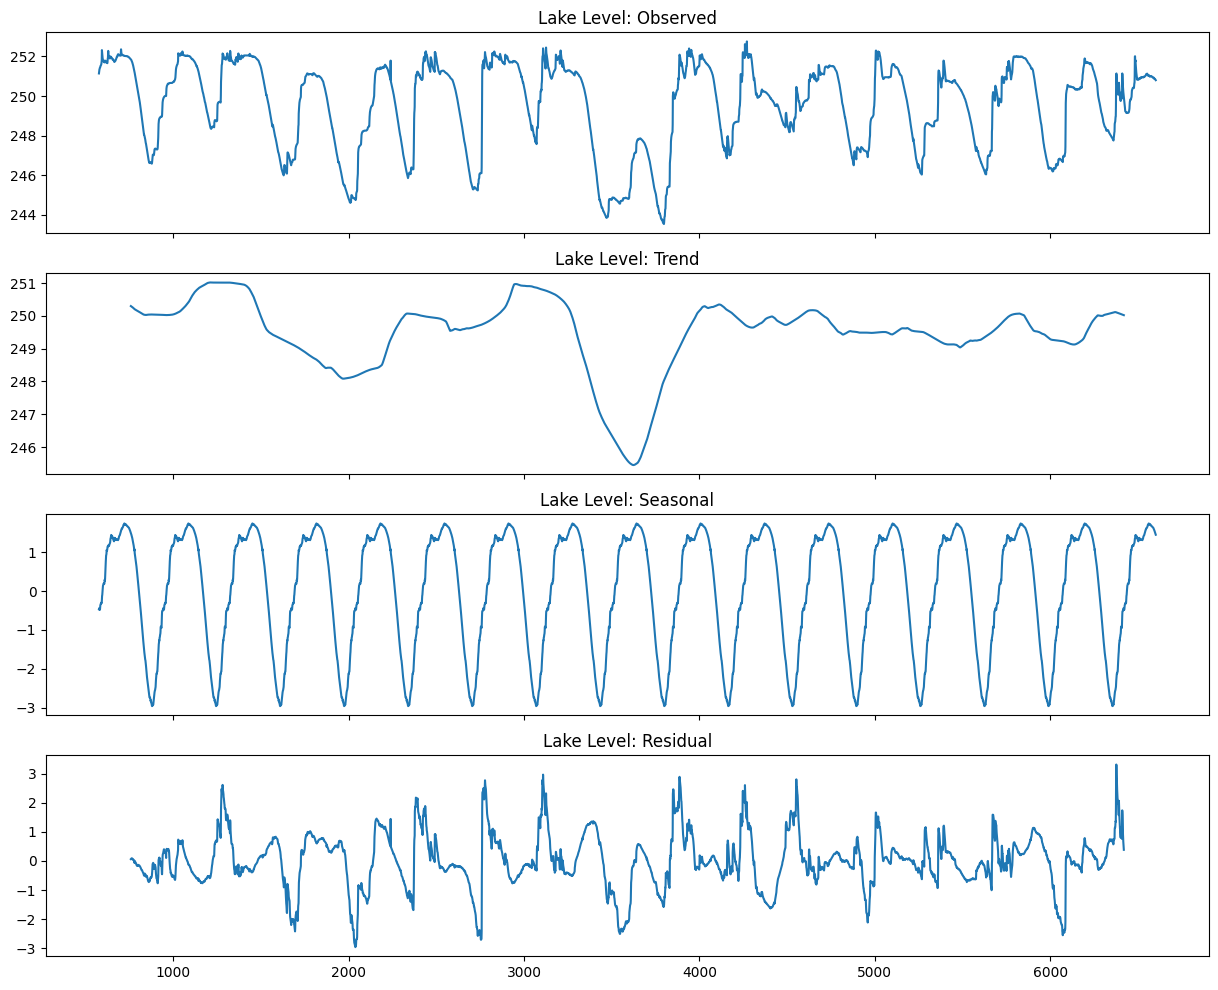

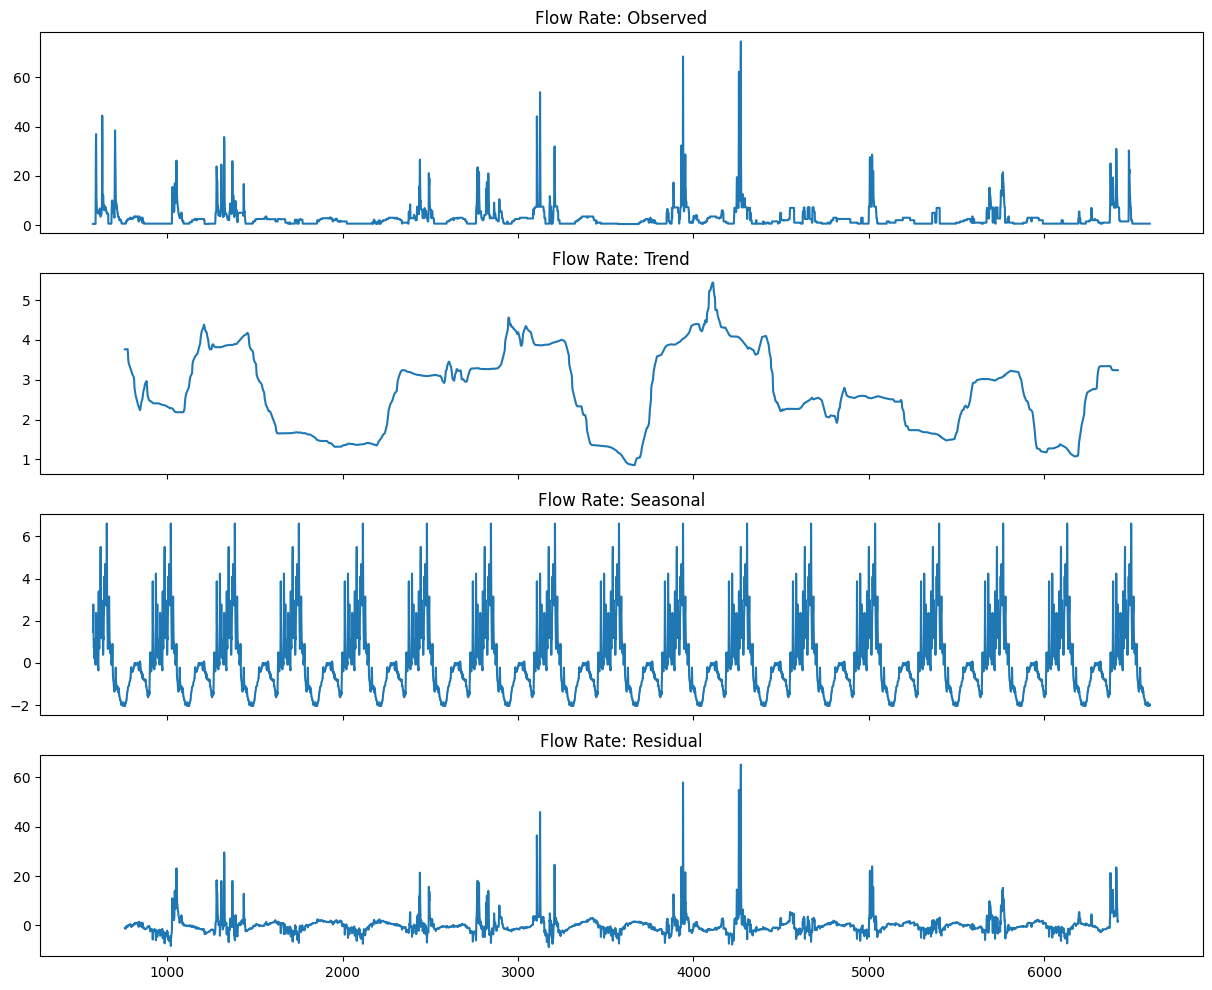

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the Lake_Level time series
decomp_lake_level = seasonal_decompose(df_Bilancino['Lake_Level'].fillna(method='ffill'), model='additive', period=365)
decomp_flow_rate = seasonal_decompose(df_Bilancino['Flow_Rate'].fillna(method='ffill'), model='additive', period=365)

# Plot Lake Level Decomposition
f, ax = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
decomp_lake_level.observed.plot(ax=ax[0], title='Lake Level: Observed')
decomp_lake_level.trend.plot(ax=ax[1], title='Lake Level: Trend')
decomp_lake_level.seasonal.plot(ax=ax[2], title='Lake Level: Seasonal')
decomp_lake_level.resid.plot(ax=ax[3], title='Lake Level: Residual')

plt.show()

# Plot Flow Rate Decomposition
f, ax = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
decomp_flow_rate.observed.plot(ax=ax[0], title='Flow Rate: Observed')
decomp_flow_rate.trend.plot(ax=ax[1], title='Flow Rate: Trend')
decomp_flow_rate.seasonal.plot(ax=ax[2], title='Flow Rate: Seasonal')
decomp_flow_rate.resid.plot(ax=ax[3], title='Flow Rate: Residual')

plt.show()

Autocorrelation of the Data

/tmp/ipykernel_580/2511227491.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plot_acf(df_Bilancino['Lake_Level'].fillna(method='ffill'), lags=50, ax=ax[0])
/tmp/ipykernel_580/2511227491.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plot_pacf(df_Bilancino['Lake_Level'].fillna(method='ffill'), lags=50, ax=ax[1])


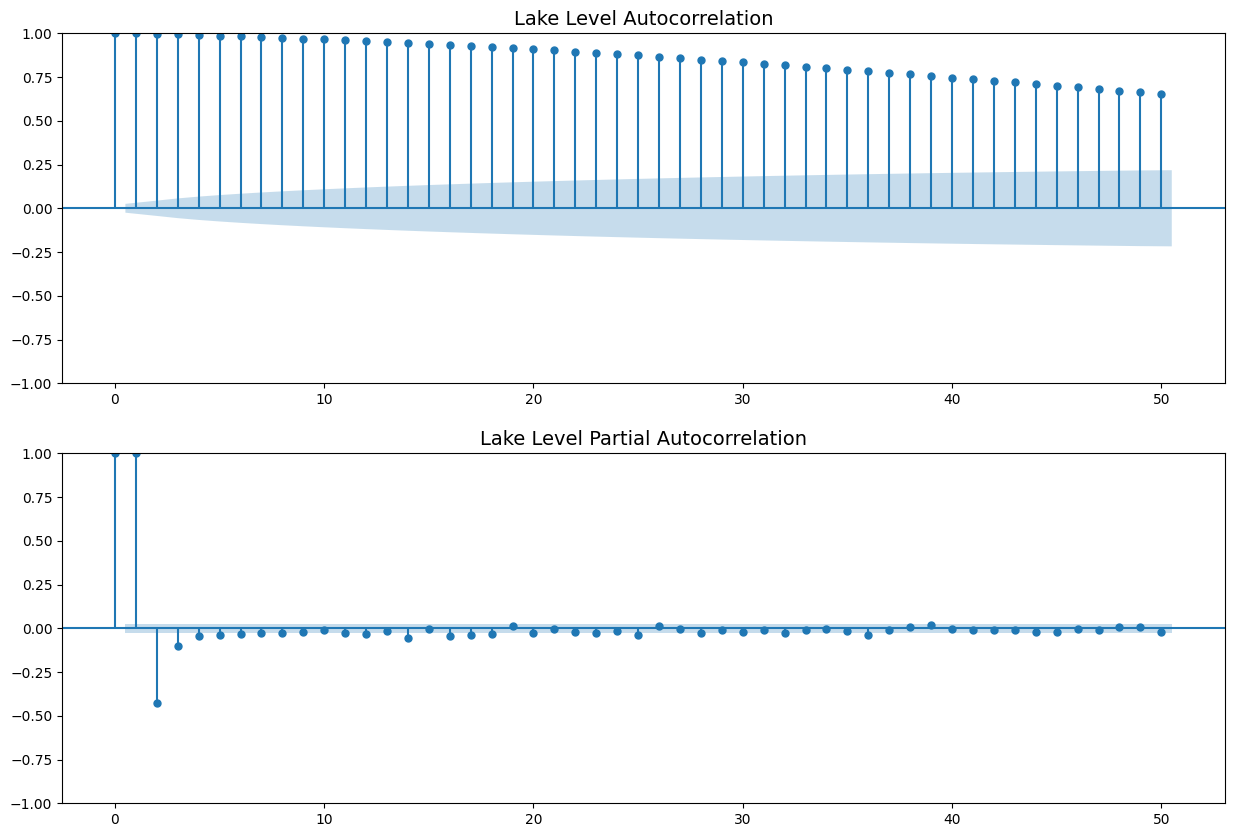

/tmp/ipykernel_580/2511227491.py:14: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plot_acf(df_Bilancino['Flow_Rate'].fillna(method='ffill'), lags=50, ax=ax[0])
/tmp/ipykernel_580/2511227491.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  plot_pacf(df_Bilancino['Flow_Rate'].fillna(method='ffill'), lags=50, ax=ax[1])


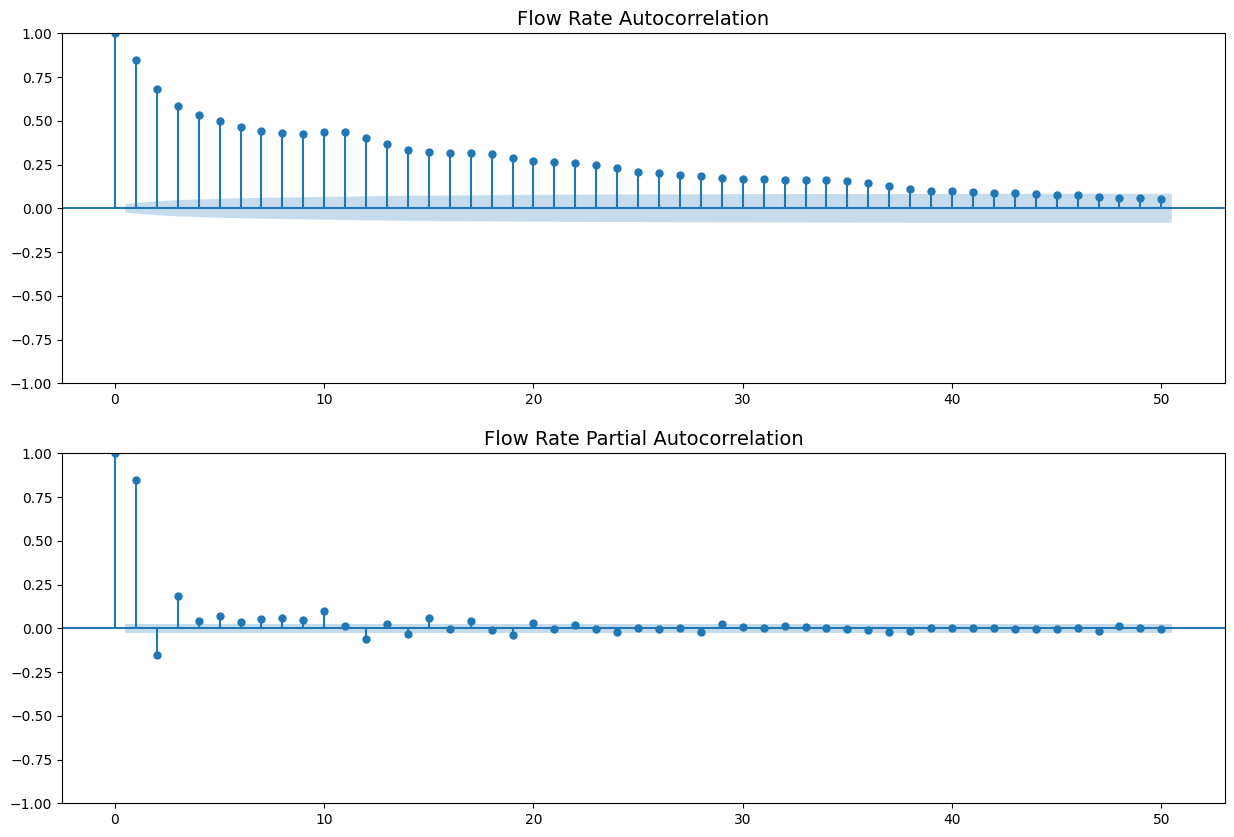

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation and Partial Autocorrelation for Lake Level
f, ax = plt.subplots(2, 1, figsize=(15, 10))
plot_acf(df_Bilancino['Lake_Level'].fillna(method='ffill'), lags=50, ax=ax[0])
ax[0].set_title('Lake Level Autocorrelation', fontsize=14)
plot_pacf(df_Bilancino['Lake_Level'].fillna(method='ffill'), lags=50, ax=ax[1])
ax[1].set_title('Lake Level Partial Autocorrelation', fontsize=14)

plt.show()

# Autocorrelation and Partial Autocorrelation for Flow Rate
f, ax = plt.subplots(2, 1, figsize=(15, 10))
plot_acf(df_Bilancino['Flow_Rate'].fillna(method='ffill'), lags=50, ax=ax[0])
ax[0].set_title('Flow Rate Autocorrelation', fontsize=14)
plot_pacf(df_Bilancino['Flow_Rate'].fillna(method='ffill'), lags=50, ax=ax[1])
ax[1].set_title('Flow Rate Partial Autocorrelation', fontsize=14)

plt.show()

Explicación de las autocorrelaciones. 
Como de relacionado está el dato anterior con el siguiente.
Autocorrelación positiva.

In [13]:
from statsmodels.tsa.stattools import adfuller

def adf_test(time_series):
    result = adfuller(time_series.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("The series is stationary")
    else:
        print("The series is non-stationary")

# ADF test for Lake Level
print("ADF Test for Lake Level:")
adf_test(df_Bilancino['Lake_Level'].fillna(method='ffill'))

# ADF test for Flow Rate
print("\nADF Test for Flow Rate:")
adf_test(df_Bilancino['Flow_Rate'].fillna(method='ffill'))

ADF Test for Lake Level:


/tmp/ipykernel_580/2161570014.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adf_test(df_Bilancino['Lake_Level'].fillna(method='ffill'))


ADF Statistic: -5.702961
p-value: 0.000001
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The series is stationary

ADF Test for Flow Rate:


/tmp/ipykernel_580/2161570014.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  adf_test(df_Bilancino['Flow_Rate'].fillna(method='ffill'))


ADF Statistic: -10.092709
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The series is stationary


Modeling 

In [14]:
import statsmodels.api as sm
from pmdarima import auto_arima

# Find the best SARIMA model
sarima_model = auto_arima(df_Bilancino['Flow_Rate'].fillna(method='ffill'), 
                          seasonal=True, m=52, # weekly iteration. (he tenido que bajar el seasonal period a semanal y poner un máximo de iteraciones por búsqueda para que mi ordenador pudiera entrenar el modelo)
                          trace=True,
                          error_action='warn',  
                          suppress_warnings=True,
                          maxiter=3, # Maximum iterations by search
                          stepwise=True)



Performing stepwise search to minimize aic


/tmp/ipykernel_580/3161178406.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sarima_model = auto_arima(df_Bilancino['Flow_Rate'].fillna(method='ffill'),


 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=26135.279, Time=20.50 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=34199.863, Time=0.06 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=26513.087, Time=11.91 sec


: 

: 

In [ ]:
# Fit the SARIMA model
sarima_model.fit(df_Bilancino['Flow_Rate'].fillna(method='ffill'))

# Summary of the SARIMA model
print(sarima_model.summary())

/tmp/ipykernel_13689/254866397.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sarima_model.fit(df_Bilancino['Flow_Rate'].fillna(method='ffill'))


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 6026
Model:             SARIMAX(2, 0, 2)x(0, 0, [1], 12)   Log Likelihood              -13020.157
Date:                              Tue, 13 Aug 2024   AIC                          26054.314
Time:                                      15:51:06   BIC                          26101.241
Sample:                                           0   HQIC                         26070.606
                                             - 6026                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0502      0.014      3.505      0.000       0.022       0.078
ar.L1          1.44